In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import timedelta
import eda
# !pip install timedelta

In [2]:
resid = pd.read_csv('../data/02_Shinhan_Card/shinhan_dataset(내국인).txt', sep='\t')
seoul = pd.read_csv('../data/06_Epidemic_Datasets/Seoul_Covid.csv')

In [3]:
resid = eda.card_preprocessing(resid)
resid.rename(columns={'STD_DD':'STD_YMD', 'DONG_NM':'HDONG_NM'}, inplace=True)
print(resid.shape)
resid.head()

(2537753, 8)


,STD_YMD,GU_NM,HDONG_NM,UP_NM,SEX_CD,AGE_CD,USE_CNT,USE_AMT
0,2019-02-01,대구 중구,동인동,숙박,F,25,11,595
1,2019-02-01,대구 중구,동인동,숙박,F,50,5,243
2,2019-02-01,대구 중구,동인동,숙박,F,55,5,27
3,2019-02-01,대구 중구,동인동,숙박,M,20,11,243
4,2019-02-01,대구 중구,동인동,숙박,M,25,11,433


## 질병 데이터

In [4]:
#대구의 질병 데이터
ds = pd.read_csv('../data/06_Epidemic_Datasets/Suseong_Gu.csv', encoding='cp949')
ds.rename(columns={'날짜':'STD_YMD', '확진자 수':'PT_CNT', '확진자 누계':'CUM_PT'},
          inplace=True)
ds['STD_YMD'] = ds['STD_YMD'].astype('datetime64')
ds = ds.set_index('STD_YMD')
ds = ds[:'2020-05']

## 카드 매출 데이터

#### 날짜별,구별(, 동별)에 따른 이용금액의 합
#### 업종에 따라 이상치가 적은 업종만을 사용해야 할 듯

In [5]:
amt = resid['USE_AMT'].groupby([resid['STD_YMD'], resid['GU_NM']]).sum().reset_index()
amt['DAY'] = amt['STD_YMD'].apply(lambda x: x.strftime('%A')[:3])
amt.index = amt.STD_YMD
amt = amt.drop('STD_YMD', axis = 1)
amt

,GU_NM,USE_AMT,DAY
STD_YMD,,,
2019-02-01,대구 수성구,6716737,Fri
2019-02-01,대구 중구,5343958,Fri
2019-02-01,서울 노원구,8229490,Fri
2019-02-01,서울 중구,14315499,Fri
2019-02-02,대구 수성구,7833124,Sat
...,...,...,...
2020-05-30,서울 중구,15396099,Sat
2020-05-31,대구 수성구,4572552,Sun
2020-05-31,대구 중구,2927035,Sun


## 각 구별 데이터 슬라이싱

In [6]:
sj_amt = amt.query('GU_NM == "서울 중구"')
sn_amt = amt.query('GU_NM == "서울 노원구"')
dj_amt = amt.query('GU_NM == "대구 중구"')
ds_amt = amt.query('GU_NM == "대구 수성구"')

# 서울시 중구

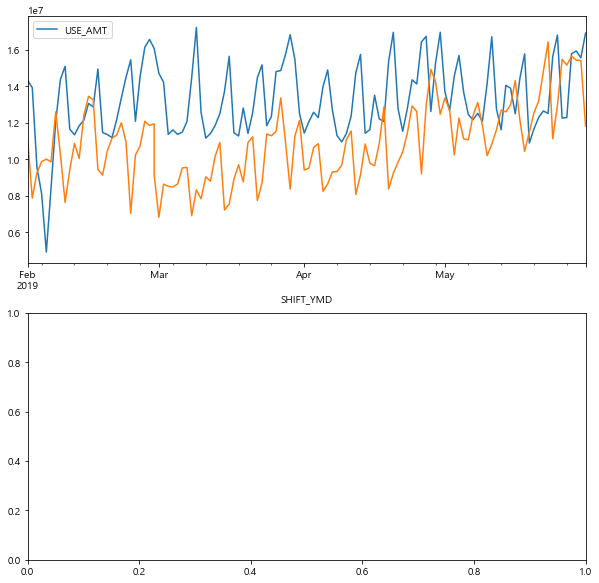

In [7]:
# 서울시 중구의 2019, 2020년의 매출총액 시계열

fig, ax = plt.subplots(2,1, figsize= (10, 10) )

sj_amt['2019'].plot(ax = ax[0])
sj_amt['2020'].reset_index().assign(SHIFT_YMD = lambda x: x['STD_YMD'] - pd.DateOffset(years=1)) \
.set_index('SHIFT_YMD')['USE_AMT'].plot(label = '2020' ,ax = ax[0])

# ds['PT_CNT'].plot(ax = ax[1])
plt.show()

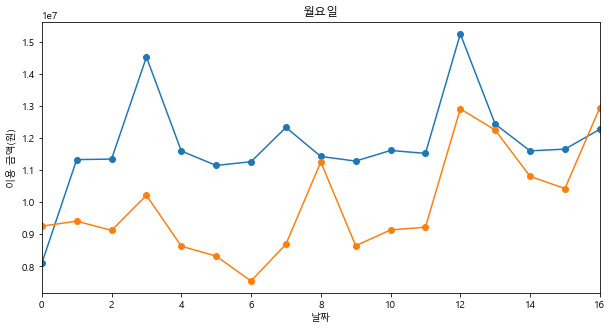

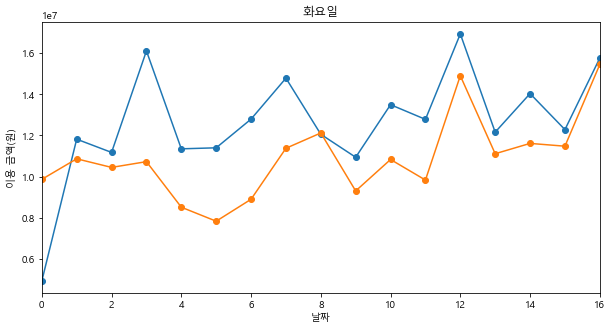

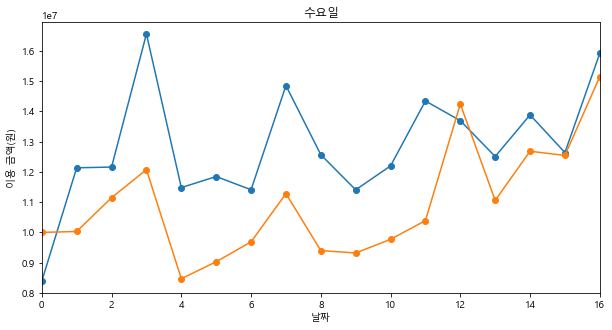

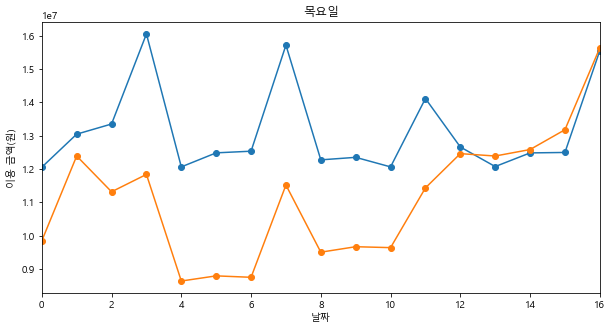

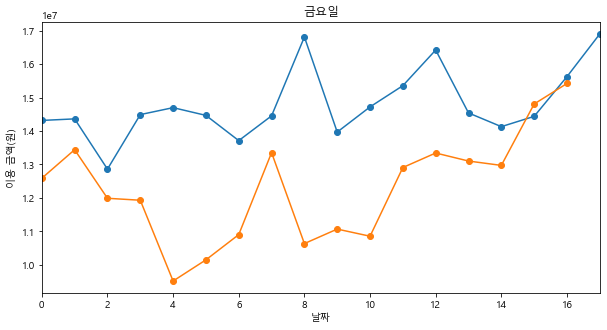

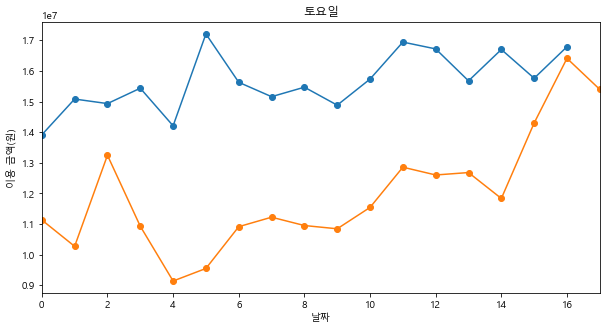

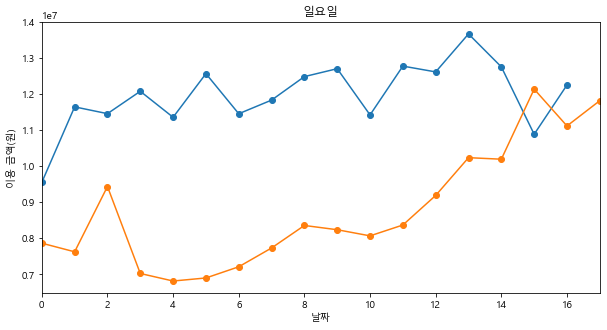

In [8]:
# 서울시 중구의 요일별 추이

days = {'Mon': '월요일', 'Tue': '화요일', 'Wed': '수요일',
        'Thu': '목요일', 'Fri': '금요일', 'Sat': '토요일', 'Sun': '일요일'}
for i in days:
    fig, ax = plt.subplots(figsize = (10,5))
    
    sj_amt['2019'].query('DAY == @i').reset_index()['USE_AMT'].plot(label = '2019',marker = 'o', ax = ax)
    sj_amt['2020'].query('DAY == @i').reset_index()['USE_AMT'].plot(label = '2020',marker = 'o', ax = ax)
    
    plt.title(days.get(i))
    plt.xlabel('날짜')
    plt.ylabel('이용 금액(원)')
    
    plt.show()

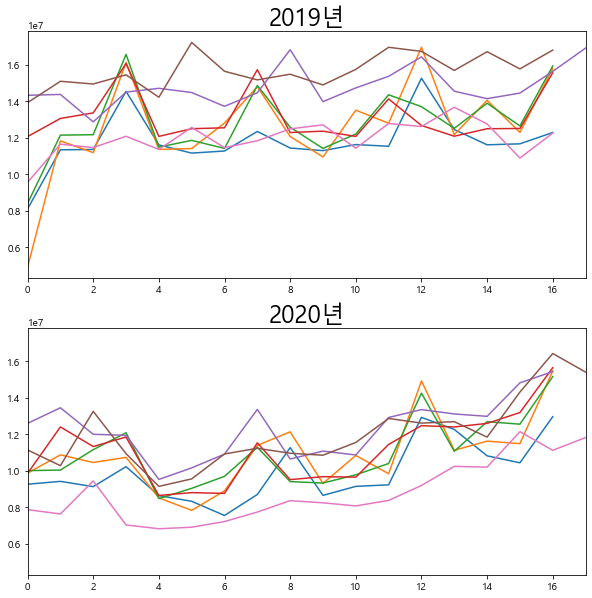

In [9]:
days = {'Mon': '월요일', 'Tue': '화요일', 'Wed': '수요일',
        'Thu': '목요일','Fri': '금요일', 'Sat': '토요일', 'Sun': '일요일'}
fig, ax = plt.subplots(2,1, figsize = (10,10), sharey = True )
ax[0].set_title('2019년', fontsize = 24)
ax[1].set_title('2020년', fontsize = 24)



for a in days:
    sj_amt['2019'].query('DAY == @a').reset_index()['USE_AMT'].plot(ax = ax[0], label = days.get(a))    
for a in days:
    sj_amt['2020'].query('DAY == @a').reset_index()['USE_AMT'].plot(ax = ax[1], label = days.get(a))

plt.show()

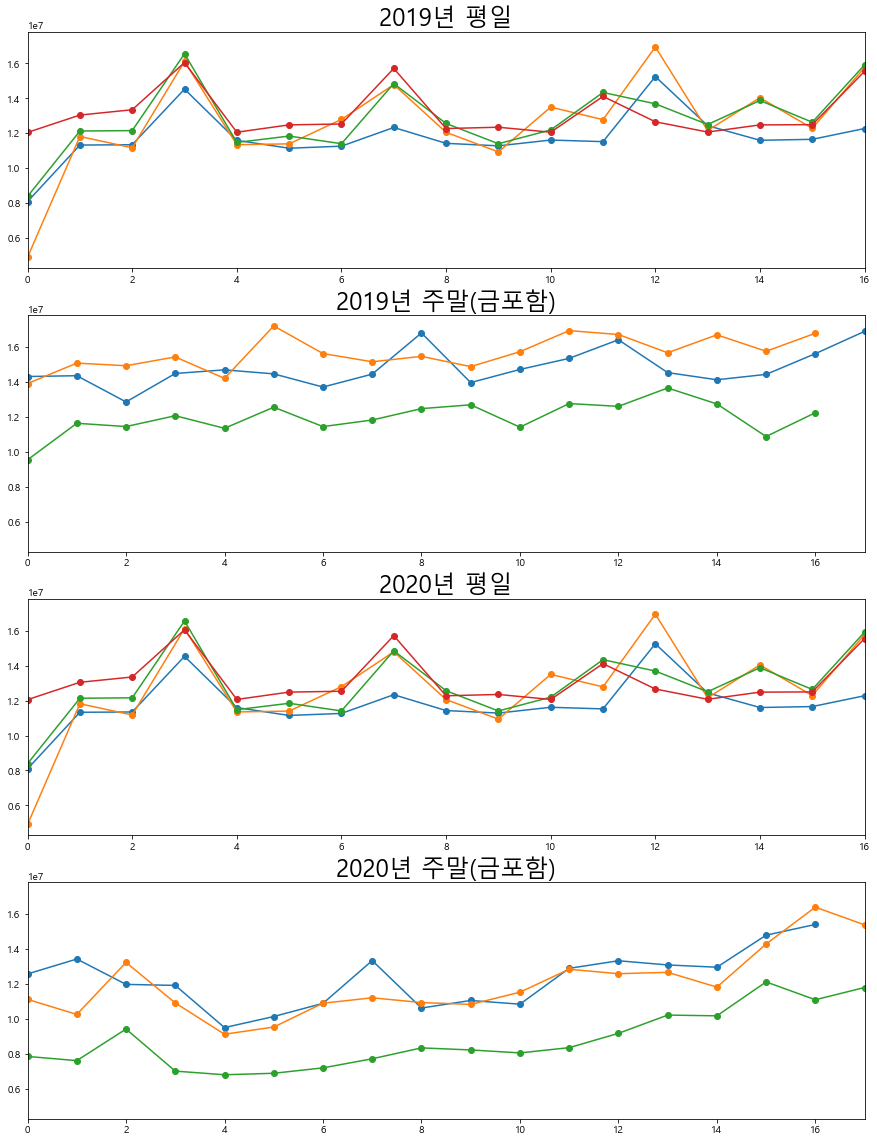

In [10]:
days = {'Mon': '월요일', 'Tue': '화요일', 'Wed': '수요일',
        'Thu': '목요일'}
wdays = {'Fri': '금요일', 'Sat': '토요일', 'Sun': '일요일'}
fig, ax = plt.subplots(4,1, figsize = (15,20), sharey = True )
ax[0].set_title('2019년 평일', fontsize = 24)
ax[1].set_title('2019년 주말(금포함)', fontsize = 24)
ax[2].set_title('2020년 평일', fontsize = 24)
ax[3].set_title('2020년 주말(금포함)', fontsize = 24)


for a in days:
    sj_amt['2019'].query('DAY == @a').reset_index()['USE_AMT'].plot(ax = ax[0],marker = 'o', label = days.get(a))    
for a in wdays:
    sj_amt['2019'].query('DAY == @a').reset_index()['USE_AMT'].plot(ax = ax[1],marker = 'o', label = wdays.get(a))
for a in days:
    sj_amt['2019'].query('DAY == @a').reset_index()['USE_AMT'].plot(ax = ax[2],marker = 'o', label = days.get(a))
for a in wdays:
    sj_amt['2020'].query('DAY == @a').reset_index()['USE_AMT'].plot(ax = ax[3],marker = 'o', label = wdays.get(a))    

plt.show()

# 서울시 노원구

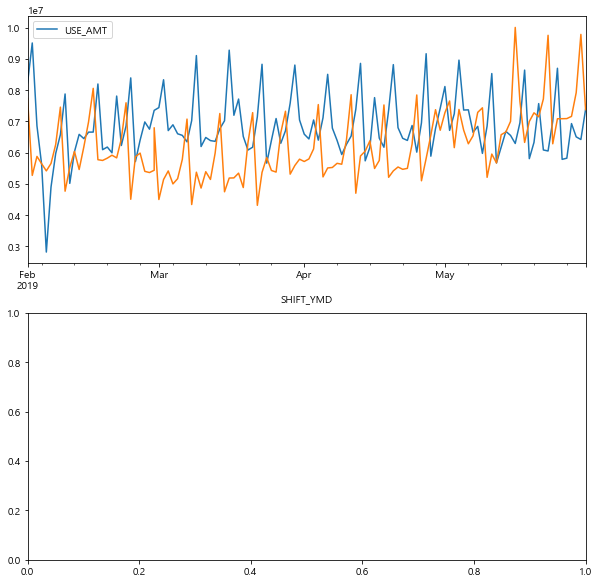

In [11]:
fig, ax = plt.subplots(2,1, figsize= (10, 10) )

sn_amt['2019'].plot(ax = ax[0])
sn_amt['2020'].reset_index().assign(SHIFT_YMD = lambda x: x['STD_YMD'] - pd.DateOffset(years=1)) \
.set_index('SHIFT_YMD')['USE_AMT'].plot(label = '2020' ,ax = ax[0])

#ds['PT_CNT'].plot(ax = ax[1])
plt.show()

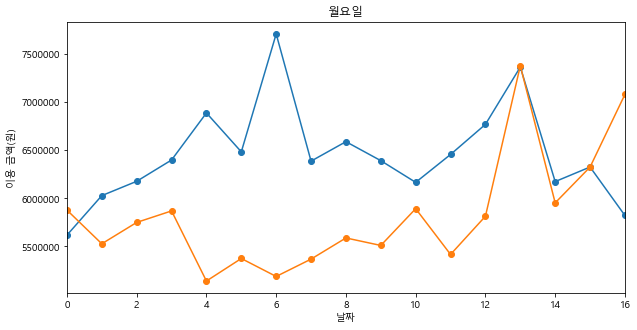

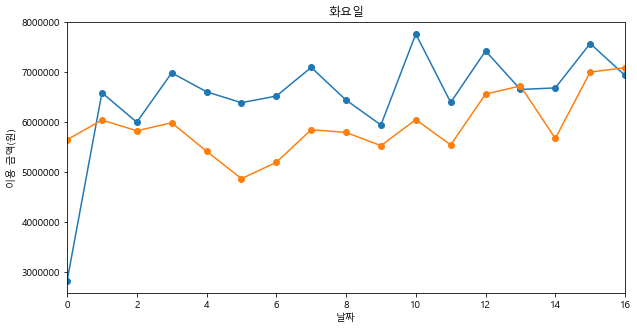

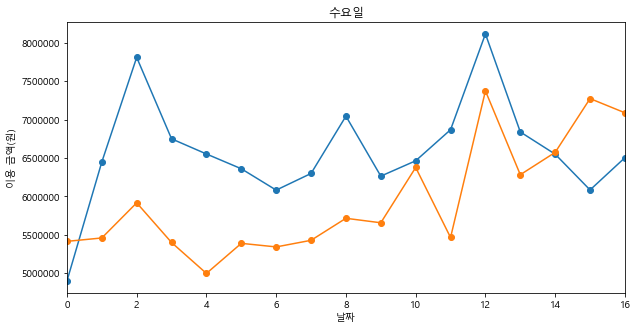

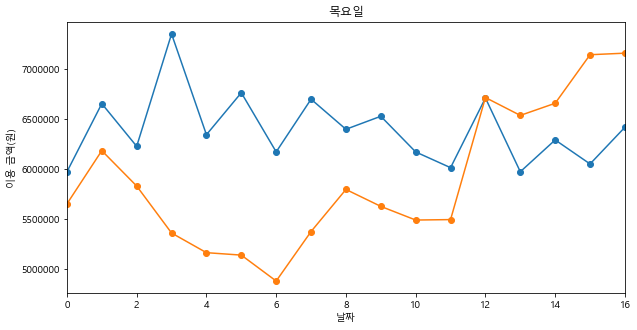

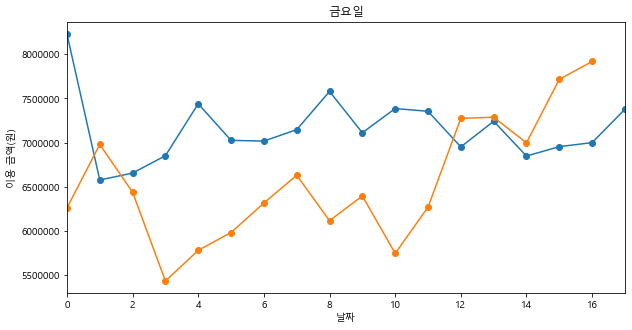

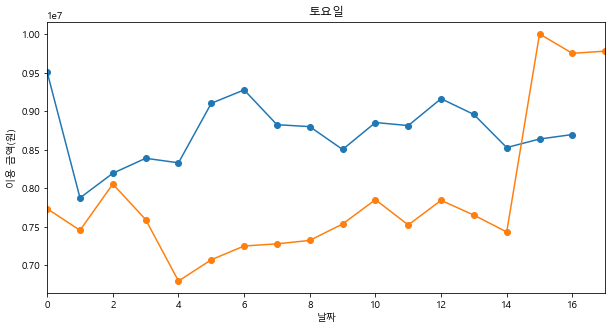

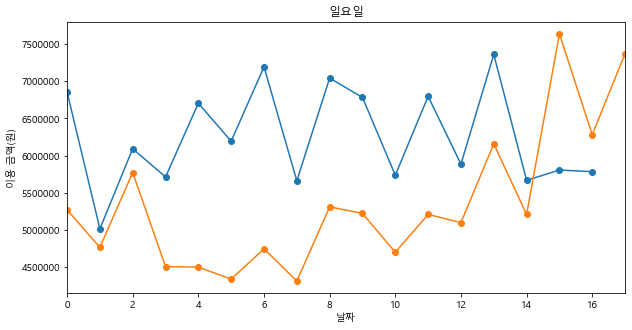

In [12]:
days = {'Mon': '월요일', 'Tue': '화요일', 'Wed': '수요일',
        'Thu': '목요일', 'Fri': '금요일', 'Sat': '토요일', 'Sun': '일요일'}
for i in days:
    fig, ax = plt.subplots(figsize = (10,5))
    
    sn_amt['2019'].query('DAY == @i').reset_index()['USE_AMT'].plot(label = '2019',marker = 'o', ax = ax)
    sn_amt['2020'].query('DAY == @i').reset_index()['USE_AMT'].plot(label = '2020',marker = 'o', ax = ax)
    
    plt.title(days.get(i))
    plt.xlabel('날짜')
    plt.ylabel('이용 금액(원)')
    
    plt.show()

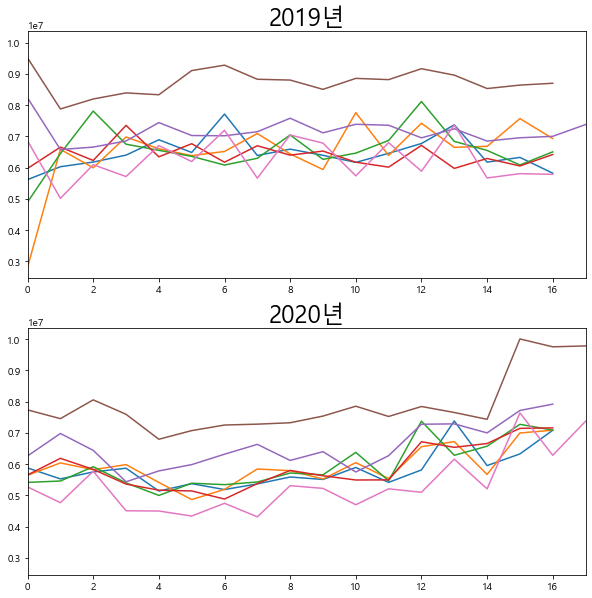

In [13]:
days = {'Mon': '월요일', 'Tue': '화요일', 'Wed': '수요일',
        'Thu': '목요일','Fri': '금요일', 'Sat': '토요일', 'Sun': '일요일'}
fig, ax = plt.subplots(2,1, figsize = (10,10), sharey = True )
ax[0].set_title('2019년', fontsize = 24)
ax[1].set_title('2020년', fontsize = 24)



for a in days:
    sn_amt['2019'].query('DAY == @a').reset_index()['USE_AMT'].plot(ax = ax[0], label = days.get(a))    
for a in days:
    sn_amt['2020'].query('DAY == @a').reset_index()['USE_AMT'].plot(ax = ax[1], label = days.get(a))

plt.show()

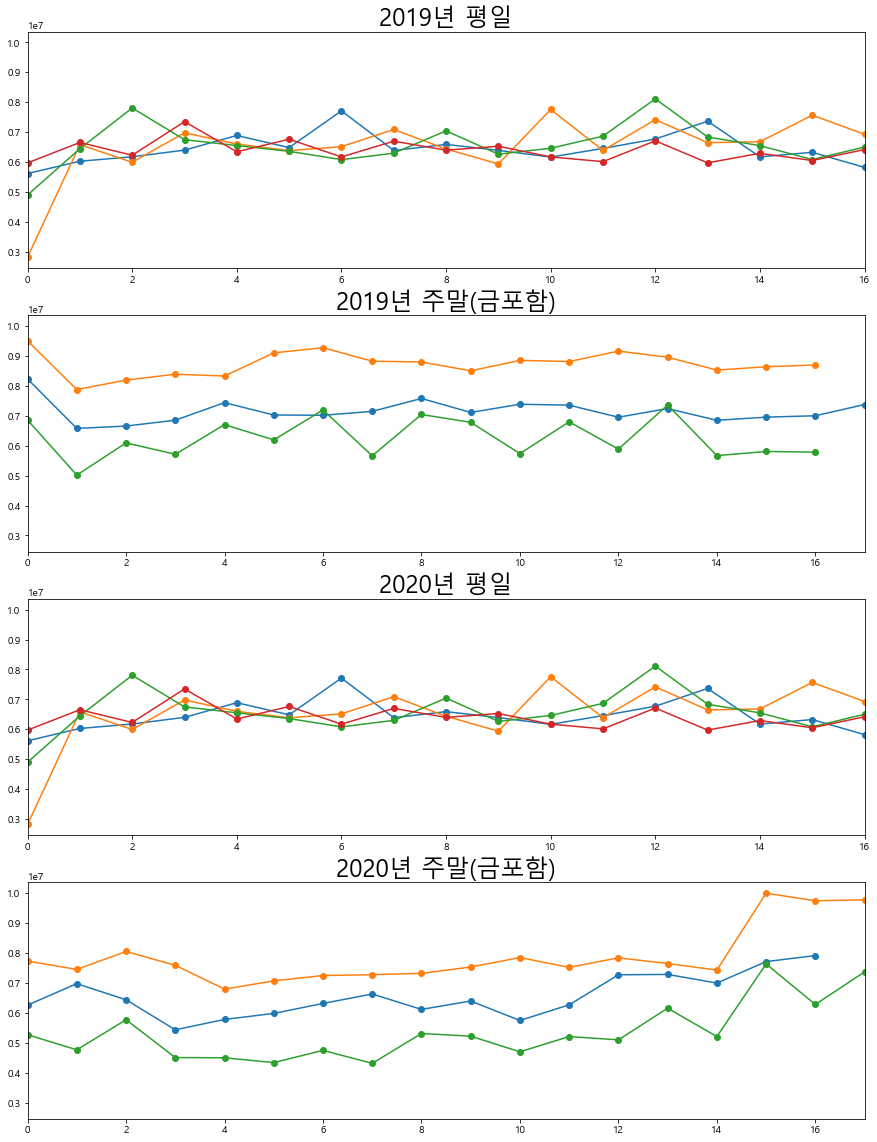

In [14]:
days = {'Mon': '월요일', 'Tue': '화요일', 'Wed': '수요일',
        'Thu': '목요일'}
wdays = {'Fri': '금요일', 'Sat': '토요일', 'Sun': '일요일'}
fig, ax = plt.subplots(4,1, figsize = (15,20), sharey = True )
ax[0].set_title('2019년 평일', fontsize = 24)
ax[1].set_title('2019년 주말(금포함)', fontsize = 24)
ax[2].set_title('2020년 평일', fontsize = 24)
ax[3].set_title('2020년 주말(금포함)', fontsize = 24)


for a in days:
    sn_amt['2019'].query('DAY == @a').reset_index()['USE_AMT'].plot(ax = ax[0],marker = 'o', label = days.get(a))    
for a in wdays:
    sn_amt['2019'].query('DAY == @a').reset_index()['USE_AMT'].plot(ax = ax[1],marker = 'o', label = wdays.get(a))
for a in days:
    sn_amt['2019'].query('DAY == @a').reset_index()['USE_AMT'].plot(ax = ax[2],marker = 'o', label = days.get(a))
for a in wdays:
    sn_amt['2020'].query('DAY == @a').reset_index()['USE_AMT'].plot(ax = ax[3],marker = 'o', label = wdays.get(a))    

plt.show()

# 대구 중구

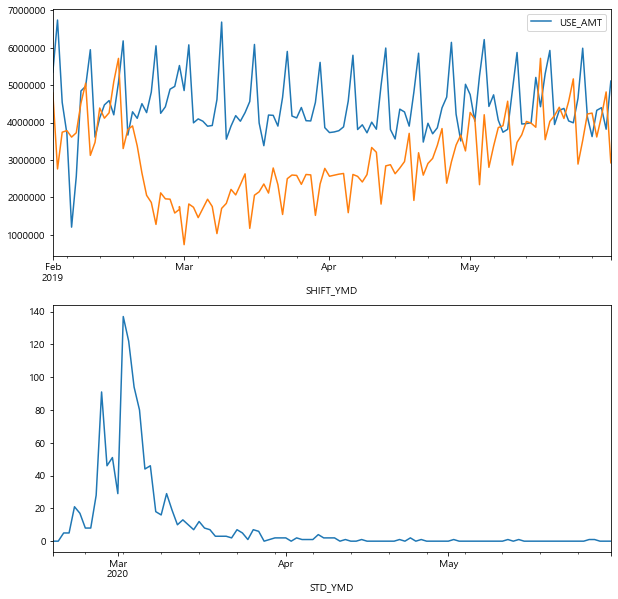

In [15]:
fig, ax = plt.subplots(2,1, figsize= (10, 10) )

dj_amt['2019'].plot(ax = ax[0])
dj_amt['2020'].reset_index().assign(SHIFT_YMD = lambda x: x['STD_YMD'] - pd.DateOffset(years=1)) \
.set_index('SHIFT_YMD')['USE_AMT'].plot(label = '2020' ,ax = ax[0])

ds['PT_CNT'].plot(ax = ax[1])
plt.show()

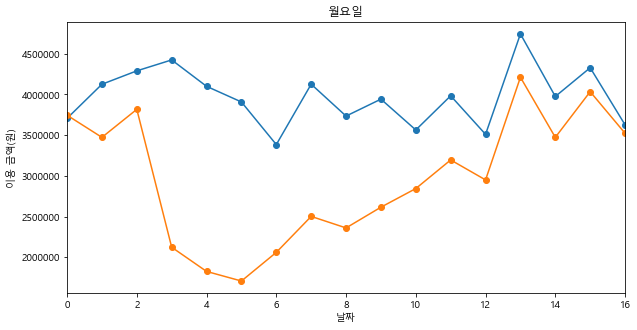

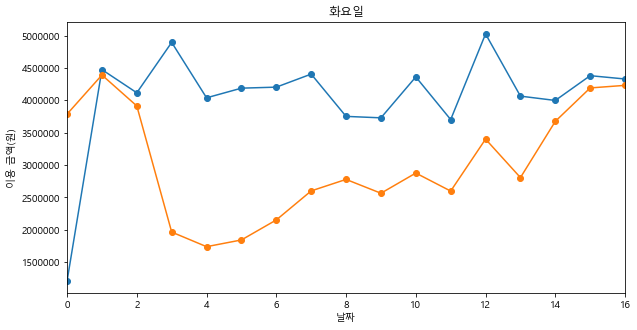

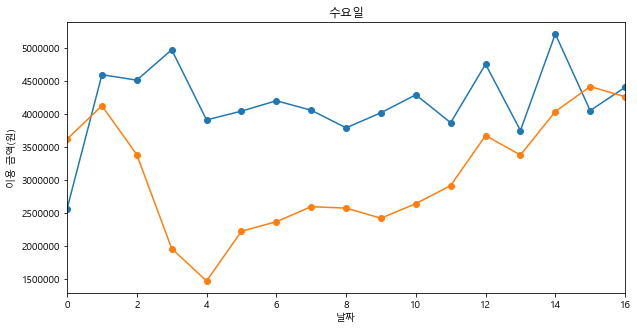

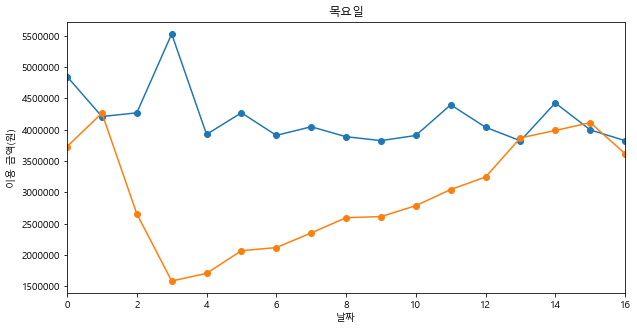

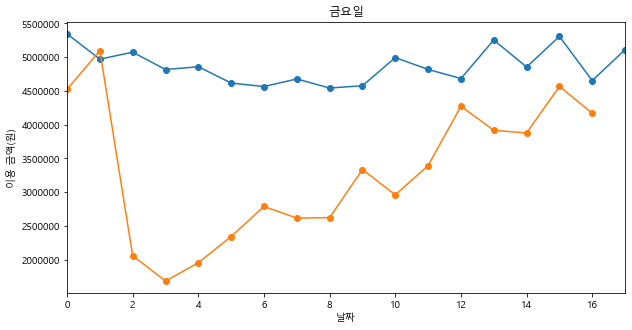

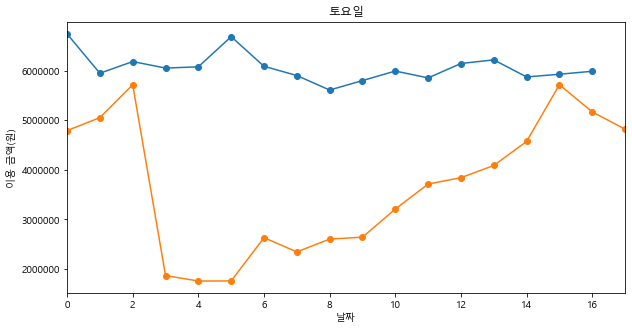

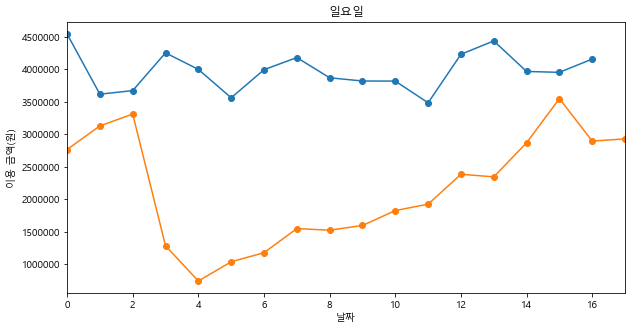

In [16]:
days = {'Mon': '월요일', 'Tue': '화요일', 'Wed': '수요일',
        'Thu': '목요일', 'Fri': '금요일', 'Sat': '토요일', 'Sun': '일요일'}
for i in days:
    fig, ax = plt.subplots(figsize = (10,5))
    
    dj_amt['2019'].query('DAY == @i').reset_index()['USE_AMT'].plot(label = '2019',marker = 'o', ax = ax)
    dj_amt['2020'].query('DAY == @i').reset_index()['USE_AMT'].plot(label = '2020',marker = 'o', ax = ax)
    
    plt.title(days.get(i))
    plt.xlabel('날짜')
    plt.ylabel('이용 금액(원)')
    
    plt.show()

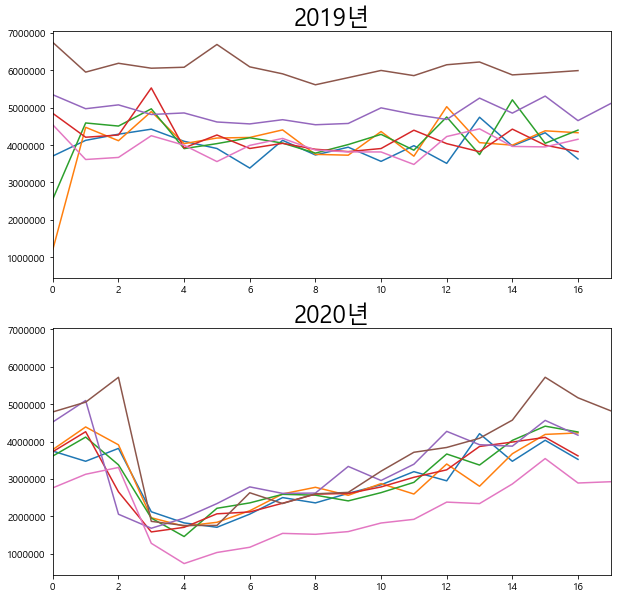

In [17]:
days = {'Mon': '월요일', 'Tue': '화요일', 'Wed': '수요일',
        'Thu': '목요일','Fri': '금요일', 'Sat': '토요일', 'Sun': '일요일'}
fig, ax = plt.subplots(2,1, figsize = (10,10), sharey = True )
ax[0].set_title('2019년', fontsize = 24)
ax[1].set_title('2020년', fontsize = 24)



for a in days:
    dj_amt['2019'].query('DAY == @a').reset_index()['USE_AMT'].plot(ax = ax[0], label = days.get(a))    
for a in days:
    dj_amt['2020'].query('DAY == @a').reset_index()['USE_AMT'].plot(ax = ax[1], label = days.get(a))

plt.show()

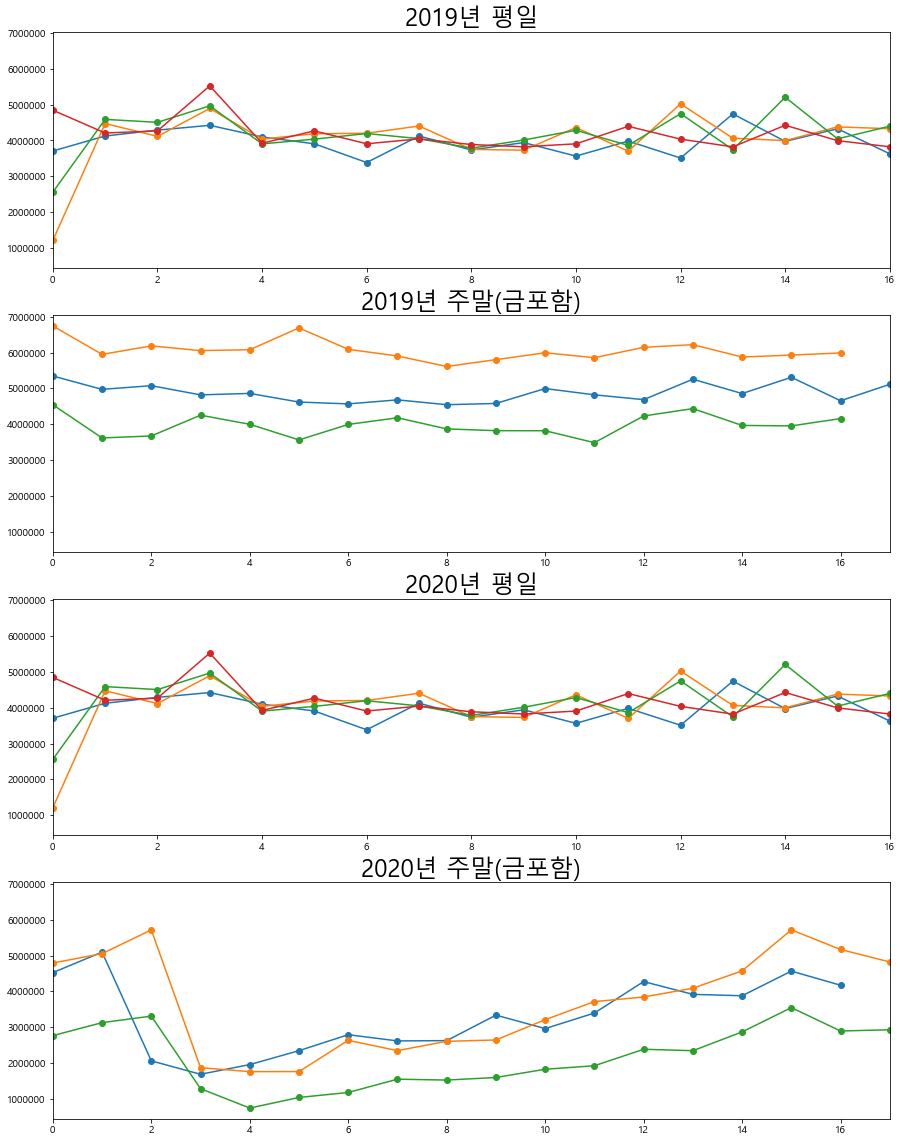

In [18]:
days = {'Mon': '월요일', 'Tue': '화요일', 'Wed': '수요일',
        'Thu': '목요일'}
wdays = {'Fri': '금요일', 'Sat': '토요일', 'Sun': '일요일'}
fig, ax = plt.subplots(4,1, figsize = (15,20), sharey = True )
ax[0].set_title('2019년 평일', fontsize = 24)
ax[1].set_title('2019년 주말(금포함)', fontsize = 24)
ax[2].set_title('2020년 평일', fontsize = 24)
ax[3].set_title('2020년 주말(금포함)', fontsize = 24)


for a in days:
    dj_amt['2019'].query('DAY == @a').reset_index()['USE_AMT'].plot(ax = ax[0],marker = 'o', label = days.get(a))    
for a in wdays:
    dj_amt['2019'].query('DAY == @a').reset_index()['USE_AMT'].plot(ax = ax[1],marker = 'o', label = wdays.get(a))
for a in days:
    dj_amt['2019'].query('DAY == @a').reset_index()['USE_AMT'].plot(ax = ax[2],marker = 'o', label = days.get(a))
for a in wdays:
    dj_amt['2020'].query('DAY == @a').reset_index()['USE_AMT'].plot(ax = ax[3],marker = 'o', label = wdays.get(a))    

plt.show()

# 대구 수성구

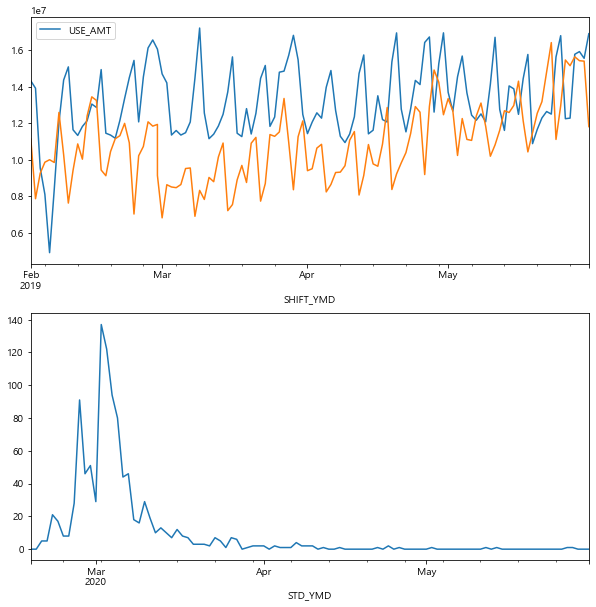

In [19]:
fig, ax = plt.subplots(2,1, figsize= (10, 10) )

sj_amt['2019'].plot(ax = ax[0])
sj_amt['2020'].reset_index().assign(SHIFT_YMD = lambda x: x['STD_YMD'] - pd.DateOffset(years=1)) \
.set_index('SHIFT_YMD')['USE_AMT'].plot(label = '2020' ,ax = ax[0])

ds['PT_CNT'].plot(ax = ax[1])
plt.show()

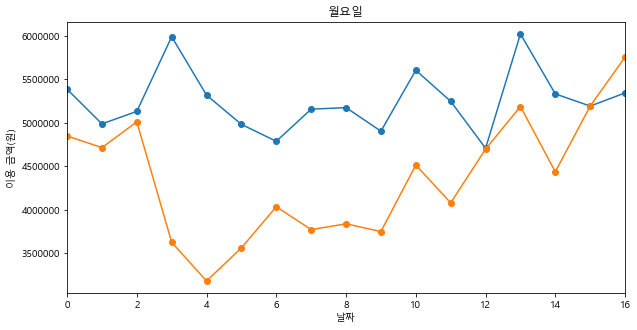

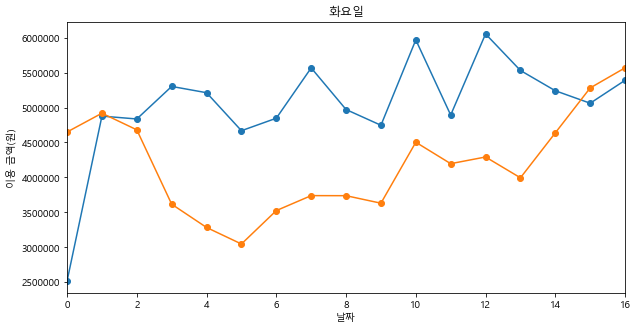

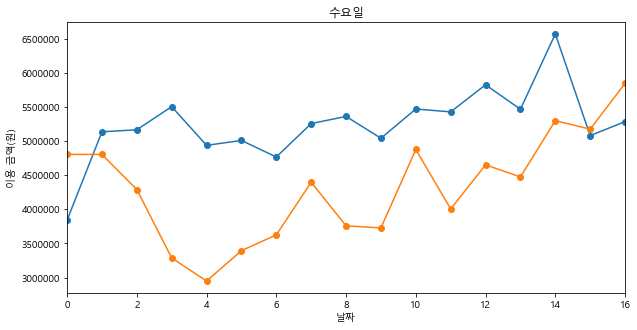

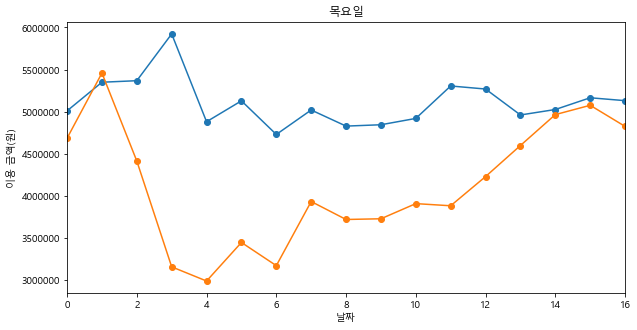

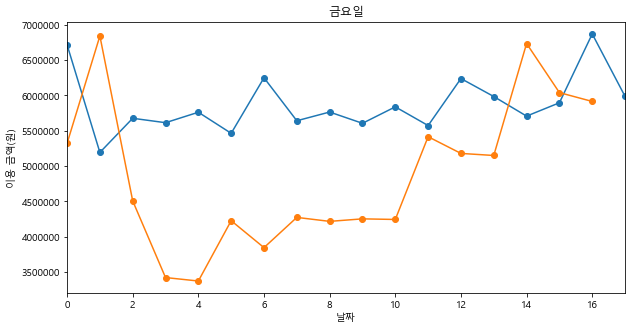

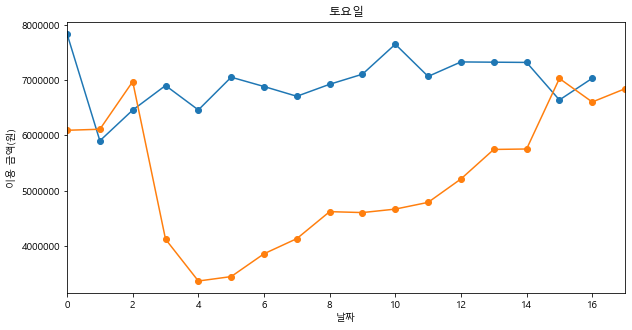

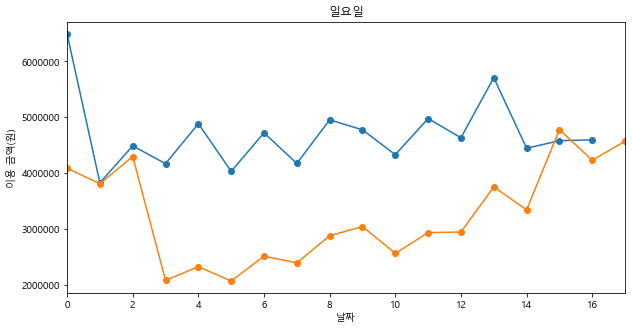

In [20]:
days = {'Mon': '월요일', 'Tue': '화요일', 'Wed': '수요일',
        'Thu': '목요일', 'Fri': '금요일', 'Sat': '토요일', 'Sun': '일요일'}
for i in days:
    fig, ax = plt.subplots(figsize = (10,5))
    
    ds_amt['2019'].query('DAY == @i').reset_index()['USE_AMT'].plot(label = '2019',marker = 'o', ax = ax)
    ds_amt['2020'].query('DAY == @i').reset_index()['USE_AMT'].plot(label = '2020',marker = 'o', ax = ax)
    
    plt.title(days.get(i))
    plt.xlabel('날짜')
    plt.ylabel('이용 금액(원)')
    
    plt.show()

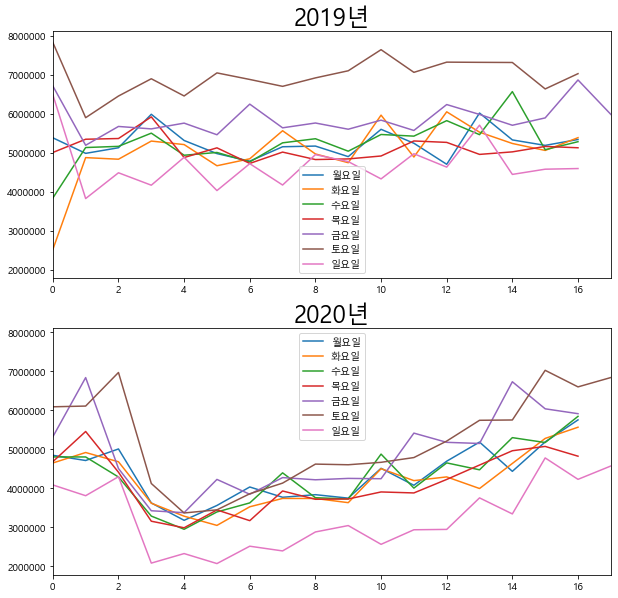

In [21]:
days = {'Mon': '월요일', 'Tue': '화요일', 'Wed': '수요일',
        'Thu': '목요일','Fri': '금요일', 'Sat': '토요일', 'Sun': '일요일'}
fig, ax = plt.subplots(2,1, figsize = (10,10), sharey = True )
ax[0].set_title('2019년', fontsize = 24)
ax[1].set_title('2020년', fontsize = 24)

for a in days:
    ds_amt['2019'].query('DAY == @a').reset_index()['USE_AMT'].plot(ax = ax[0], label = days.get(a))    
for a in days:
    ds_amt['2020'].query('DAY == @a').reset_index()['USE_AMT'].plot(ax = ax[1], label = days.get(a))
    
ax[0].legend()
ax[1].legend()   
plt.show()

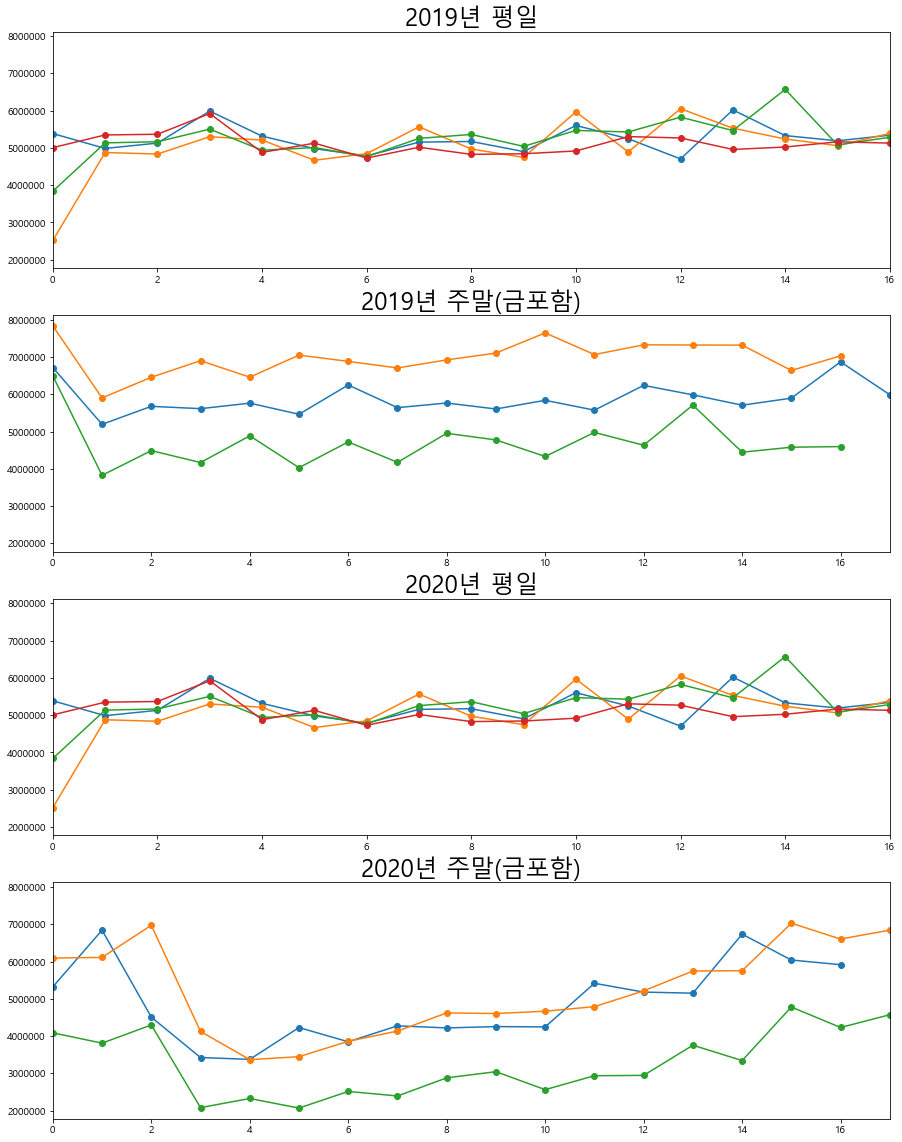

In [22]:
days = {'Mon': '월요일', 'Tue': '화요일', 'Wed': '수요일',
        'Thu': '목요일'}
wdays = {'Fri': '금요일', 'Sat': '토요일', 'Sun': '일요일'}
fig, ax = plt.subplots(4,1, figsize = (15,20), sharey = True )
ax[0].set_title('2019년 평일', fontsize = 24)
ax[1].set_title('2019년 주말(금포함)', fontsize = 24)
ax[2].set_title('2020년 평일', fontsize = 24)
ax[3].set_title('2020년 주말(금포함)', fontsize = 24)


for a in days:
    ds_amt['2019'].query('DAY == @a').reset_index()['USE_AMT'].plot(ax = ax[0],marker = 'o', label = days.get(a))    
for a in wdays:
    ds_amt['2019'].query('DAY == @a').reset_index()['USE_AMT'].plot(ax = ax[1],marker = 'o', label = wdays.get(a))
for a in days:
    ds_amt['2019'].query('DAY == @a').reset_index()['USE_AMT'].plot(ax = ax[2],marker = 'o', label = days.get(a))
for a in wdays:
    ds_amt['2020'].query('DAY == @a').reset_index()['USE_AMT'].plot(ax = ax[3],marker = 'o', label = wdays.get(a))    

plt.show()

In [23]:
resid

,STD_YMD,GU_NM,HDONG_NM,UP_NM,SEX_CD,AGE_CD,USE_CNT,USE_AMT
0,2019-02-01,대구 중구,동인동,숙박,F,25,11,595
1,2019-02-01,대구 중구,동인동,숙박,F,50,5,243
2,2019-02-01,대구 중구,동인동,숙박,F,55,5,27
3,2019-02-01,대구 중구,동인동,숙박,M,20,11,243
4,2019-02-01,대구 중구,동인동,숙박,M,25,11,433
...,...,...,...,...,...,...,...,...
2537748,2020-05-31,서울 노원구,상계10동,음료식품,M,45,19,127
2537749,2020-05-31,서울 노원구,상계10동,음료식품,M,50,33,211
2537750,2020-05-31,서울 노원구,상계10동,음료식품,M,55,9,61
2537751,2020-05-31,서울 노원구,상계10동,음료식품,M,60,19,194


In [64]:
sj_amt19 = sj_amt['2019']
sj_amt19

,GU_NM,USE_AMT,DAY
STD_YMD,,,
2019-02-01,서울 중구,14315499,Fri
2019-02-02,서울 중구,13913271,Sat
2019-02-03,서울 중구,9547937,Sun
2019-02-04,서울 중구,8096874,Mon
2019-02-05,서울 중구,4910249,Tue
...,...,...,...
2019-05-27,서울 중구,12276914,Mon
2019-05-28,서울 중구,15772117,Tue
2019-05-29,서울 중구,15919861,Wed


In [66]:
# next import libraries
from saxpy.alphabet import cuts_for_asize
import numpy as np
from saxpy.znorm import znorm
from saxpy.sax import ts_to_string
from saxpy.paa import paa

In [67]:
# how many different categories to use or how many letters in the SAX alphabet
alphabet_size = 7
# normalize the altitude data series
data_znorm = znorm(sj_amt19['USE_AMT'])
# use PAA for horizontal resolution reduction from 1300+ data points to 130 segments 
# Note: this is a fairly slow step
data_paa = paa(data_znorm, 10)
# create the SAX representation for the 130 data points
sax_representation_altitude_series = ts_to_string(data_paa, cuts_for_asize(alphabet_size))
sax_representation_altitude_series

'bceceddede'

In [68]:
e = paa(series = sj_amt19['USE_AMT'], paa_segments = 10) 
e

array([11288766.58333333, 12871232.08333333, 13706291.16666667,
       12742432.91666667, 13987858.66666667, 12906847.58333333,
       13218935.41666667, 14397808.08333333, 13437311.66666667,
       14179929.58333333])

In [69]:
import numpy as np
sax_array = np.array(list(sax_representation_altitude_series))
# create Pandas data frame from  numpy.ndarray
de = pd.DataFrame(data=sax_array[:],    # values
              index=sax_array[:],    # 1st column as index
              columns=['sax_use_amt']
                 ) 
# add an column x that has its values set to the row index of each row
de['sax_category'] = de['sax_use_amt'].apply(lambda letter: alphabet_size - (ord(letter)-97))
de['x'] = range(1, len(de) + 1)

In [70]:
de = de.set_index('x')
de

,sax_use_amt,sax_category
x,,
1,b,6
2,c,5
3,e,3
4,c,5
5,e,3
6,d,4
7,d,4
8,e,3
9,d,4


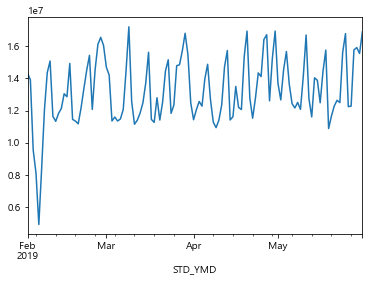

In [72]:
sj_amt19['USE_AMT'].plot()
plt.show()

## 업종별 매출 건수 확인

In [24]:
resid.index = resid.STD_YMD
resid.head()

,STD_YMD,GU_NM,HDONG_NM,UP_NM,SEX_CD,AGE_CD,USE_CNT,USE_AMT
STD_YMD,,,,,,,,
2019-02-01,2019-02-01,대구 중구,동인동,숙박,F,25,11,595
2019-02-01,2019-02-01,대구 중구,동인동,숙박,F,50,5,243
2019-02-01,2019-02-01,대구 중구,동인동,숙박,F,55,5,27
2019-02-01,2019-02-01,대구 중구,동인동,숙박,M,20,11,243
2019-02-01,2019-02-01,대구 중구,동인동,숙박,M,25,11,433


In [25]:
# 2019년 매출 건수 내림차순
resid['2019'].groupby(['GU_NM','UP_NM'])['USE_CNT'].sum().reset_index().sort_values('USE_CNT', ascending = False)[:10]

,GU_NM,UP_NM,USE_CNT
82,서울 중구,요식업소,37040665
83,서울 중구,유통업,20132124
60,서울 노원구,유통업,17369964
59,서울 노원구,요식업소,10604142
7,대구 수성구,사무통신,7545193
14,대구 수성구,유통업,7299512
13,대구 수성구,요식업소,5794901
36,대구 중구,요식업소,5416281
37,대구 중구,유통업,4728446
62,서울 노원구,의료기관,3465828


In [26]:
# 2020년 매출 건수 내림차순
resid['2020'].groupby(['GU_NM','UP_NM'])['USE_CNT'].sum().reset_index().sort_values('USE_CNT', ascending = False)[:10]

,GU_NM,UP_NM,USE_CNT
82,서울 중구,요식업소,33245739
60,서울 노원구,유통업,16109046
83,서울 중구,유통업,15304314
59,서울 노원구,요식업소,9361391
14,대구 수성구,유통업,6941251
7,대구 수성구,사무통신,4640912
13,대구 수성구,요식업소,4399549
62,서울 노원구,의료기관,3595320
37,대구 중구,유통업,3129518
36,대구 중구,요식업소,3007244


## 서울의 매출 건수 합 (내림차순)

In [27]:
resid['2019'].query('GU_NM == "서울 중구" | GU_NM == "서울 노원구"').groupby(['GU_NM','UP_NM'])['USE_CNT'] \
.sum().reset_index().sort_values('USE_CNT', ascending = False)[:10]

,GU_NM,UP_NM,USE_CNT
36,서울 중구,요식업소,37040665
37,서울 중구,유통업,20132124
14,서울 노원구,유통업,17369964
13,서울 노원구,요식업소,10604142
16,서울 노원구,의료기관,3465828
30,서울 중구,사무통신,2867786
39,서울 중구,의료기관,2401475
15,서울 노원구,음료식품,1932153
38,서울 중구,음료식품,1649155
3,서울 노원구,레저업소,1402657


In [28]:
resid['2020'].query('GU_NM == "서울 중구" | GU_NM == "서울 노원구"').groupby(['GU_NM','UP_NM'])['USE_CNT']\
.sum().reset_index().sort_values('USE_CNT', ascending = False)[:10]

,GU_NM,UP_NM,USE_CNT
36,서울 중구,요식업소,33245739
14,서울 노원구,유통업,16109046
37,서울 중구,유통업,15304314
13,서울 노원구,요식업소,9361391
16,서울 노원구,의료기관,3595320
39,서울 중구,의료기관,2610541
30,서울 중구,사무통신,1971065
15,서울 노원구,음료식품,1921431
38,서울 중구,음료식품,1482277
3,서울 노원구,레저업소,1295874


## 대구의 매출 건수 합 (내림차순)

In [29]:
resid['2019'].query('GU_NM == "대구 중구" | GU_NM == "대구 수성구"').groupby(['GU_NM','UP_NM'])['USE_CNT']\
.sum().reset_index().sort_values('USE_CNT', ascending = False)[:10]

,GU_NM,UP_NM,USE_CNT
7,대구 수성구,사무통신,7545193
14,대구 수성구,유통업,7299512
13,대구 수성구,요식업소,5794901
36,대구 중구,요식업소,5416281
37,대구 중구,유통업,4728446
16,대구 수성구,의료기관,1932484
12,대구 수성구,연료판매,1743105
39,대구 중구,의료기관,1692138
15,대구 수성구,음료식품,1332064
40,대구 중구,의복,650106


In [30]:
resid['2020'].query('GU_NM == "대구 중구" | GU_NM == "대구 수성구"').groupby(['GU_NM','UP_NM'])['USE_CNT']\
.sum().reset_index().sort_values('USE_CNT', ascending = False)[:10]

,GU_NM,UP_NM,USE_CNT
14,대구 수성구,유통업,6941251
7,대구 수성구,사무통신,4640912
13,대구 수성구,요식업소,4399549
37,대구 중구,유통업,3129518
36,대구 중구,요식업소,3007244
16,대구 수성구,의료기관,1760997
39,대구 중구,의료기관,1464421
15,대구 수성구,음료식품,1398600
12,대구 수성구,연료판매,1268827
38,대구 중구,음료식품,451651


4-3-3
일단 서울의 중구, 노원구의 요식업, 유통업의 건수가 여전히 많음
그 뒤로 대구 수성구 사무통신 유통업 요식 업소가 뒤를 이음.
** 서울시 노원구의 의료기관 매출 건수의 변화가 상대적으로 적어보임 340만 --> 359만 : 오히려 건수가 증가함.

차후에 각 매출 건수의 변화를 %(퍼센트)로 나타내야할것

일단 상위 10에 가장 많이 있는 요식업소와 유통업에 대한 데이터를 확인하겠음.

# 요식업소 & 유통업

In [31]:
resid = resid.rename(columns = {"STD_YMD": 'STD'})
up_cnt = resid.groupby(['STD','GU_NM', 'UP_NM'])['USE_CNT'].sum().reset_index()
up_cnt.index = up_cnt.STD
up_cnt = up_cnt.drop(['STD'], axis = 1)

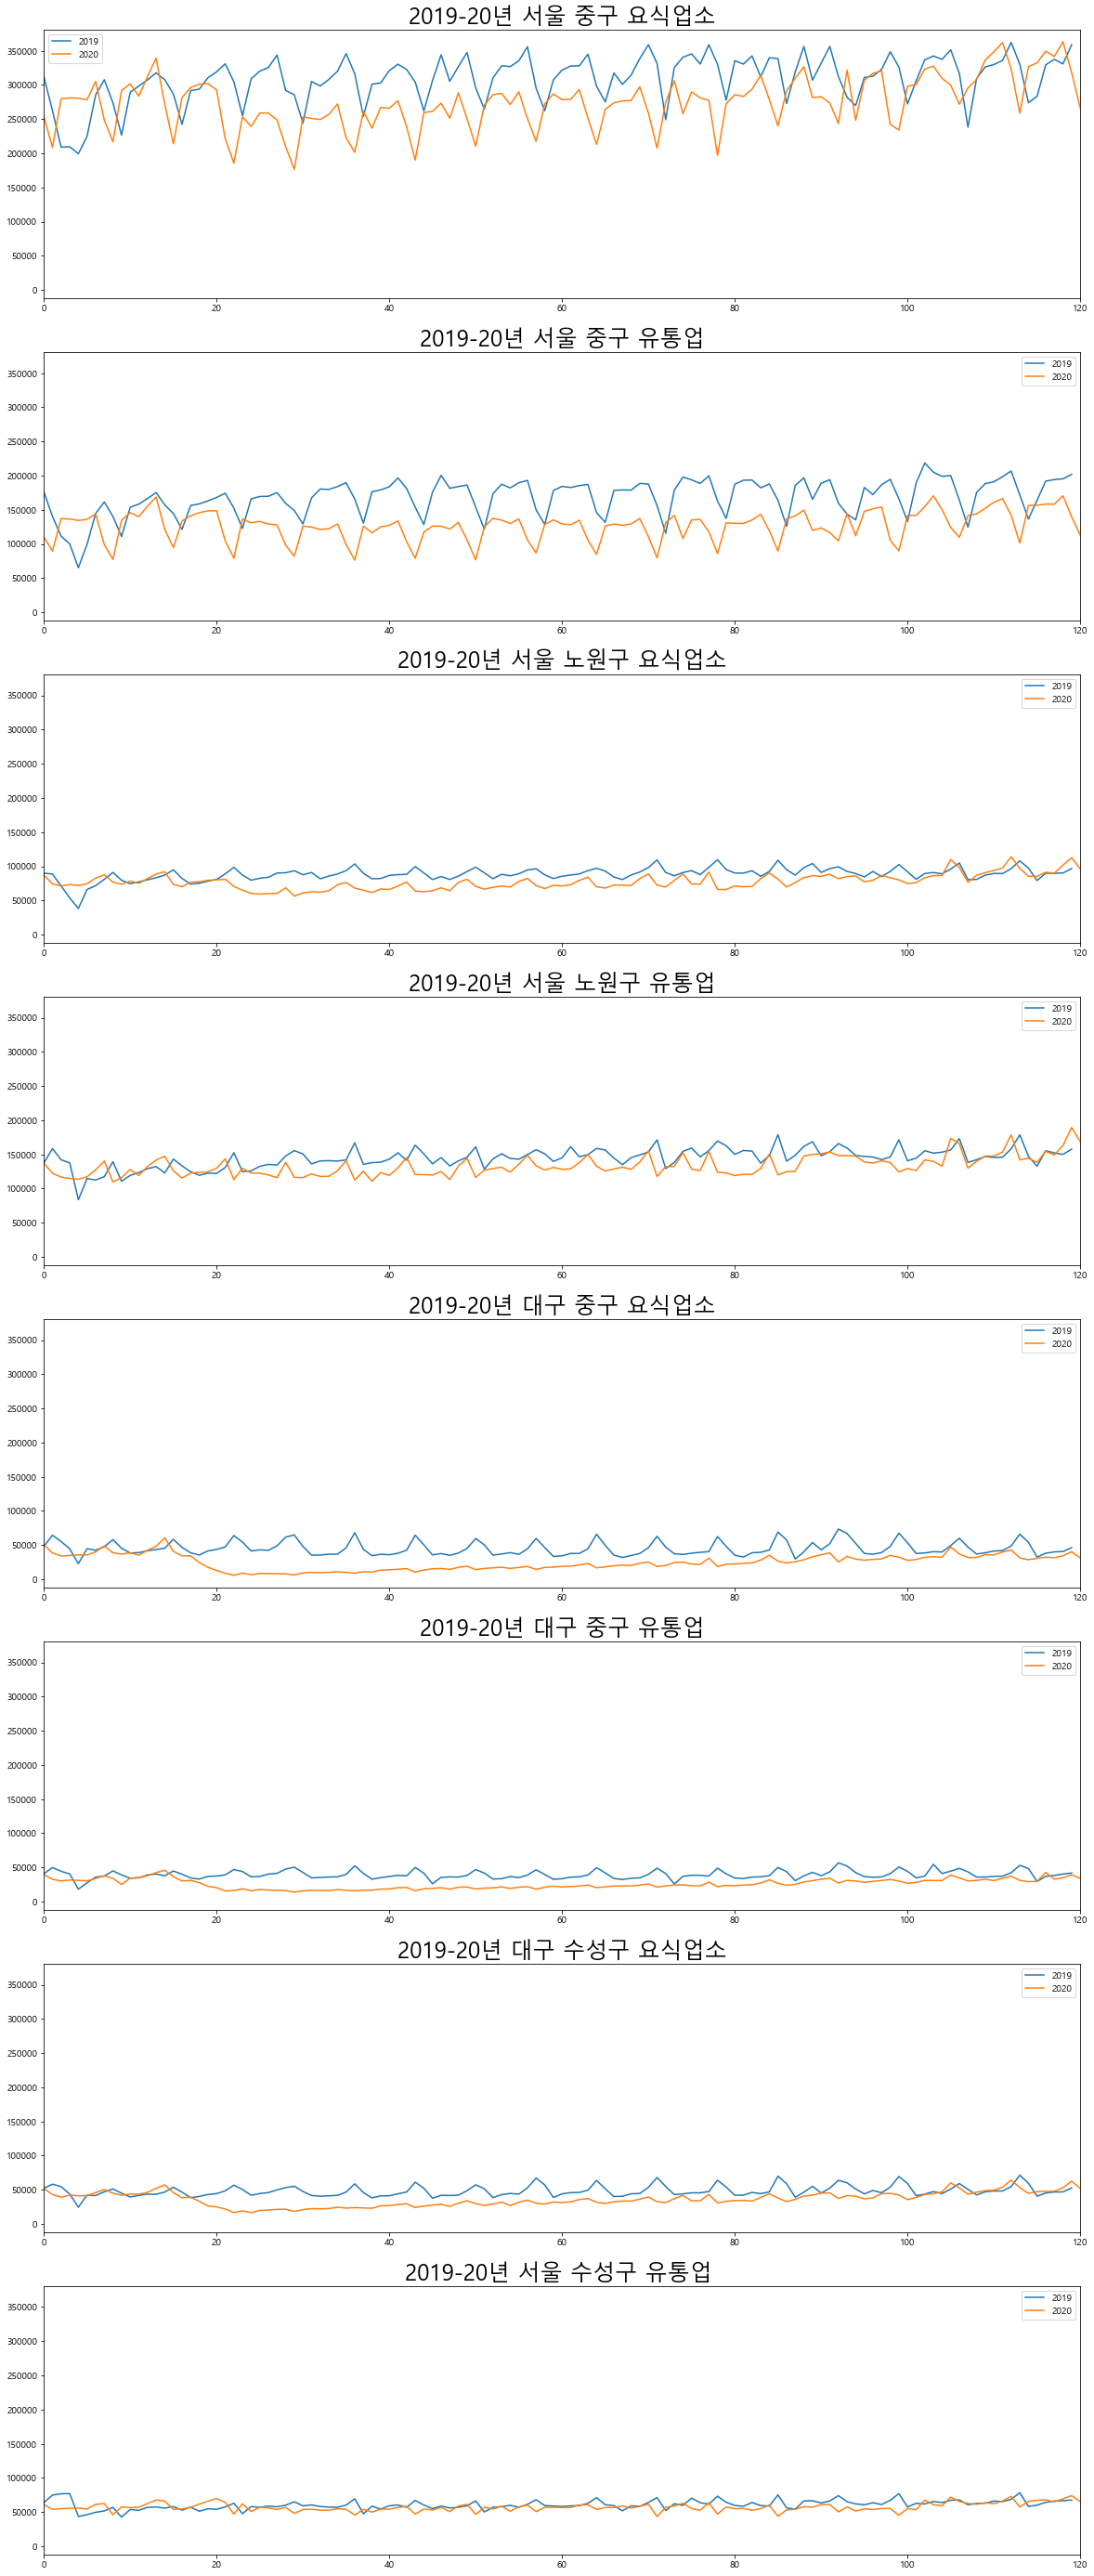

In [32]:
fig, ax = plt.subplots(8, 1, figsize = (20,50), sharey = True)

up_cnt['2019'].query('GU_NM == "서울 중구" & UP_NM == "요식업소"').reset_index()['USE_CNT'].plot(label = '2019', ax = ax[0])
up_cnt['2020'].query('GU_NM == "서울 중구" & UP_NM == "요식업소"').reset_index()['USE_CNT'].plot(label = '2020', ax = ax[0])
ax[0].set_title('2019-20년 서울 중구 요식업소', fontsize = 24)

up_cnt['2019'].query('GU_NM == "서울 중구" & UP_NM == "유통업"').reset_index()['USE_CNT'].plot(label = '2019', ax = ax[1])
up_cnt['2020'].query('GU_NM == "서울 중구" & UP_NM == "유통업"').reset_index()['USE_CNT'].plot(label = '2020', ax = ax[1])
ax[1].set_title('2019-20년 서울 중구 유통업', fontsize = 24)

up_cnt['2019'].query('GU_NM == "서울 노원구" & UP_NM == "요식업소"').reset_index()['USE_CNT'].plot(label = '2019', ax = ax[2])
up_cnt['2020'].query('GU_NM == "서울 노원구" & UP_NM == "요식업소"').reset_index()['USE_CNT'].plot(label = '2020', ax = ax[2])
ax[2].set_title('2019-20년 서울 노원구 요식업소', fontsize = 24)

up_cnt['2019'].query('GU_NM == "서울 노원구" & UP_NM == "유통업"').reset_index()['USE_CNT'].plot(label = '2019', ax = ax[3])
up_cnt['2020'].query('GU_NM == "서울 노원구" & UP_NM == "유통업"').reset_index()['USE_CNT'].plot(label = '2020', ax = ax[3])
ax[3].set_title('2019-20년 서울 노원구 유통업', fontsize = 24)



up_cnt['2019'].query('GU_NM == "대구 중구" & UP_NM == "요식업소"').reset_index()['USE_CNT'].plot(label = '2019', ax = ax[4])
up_cnt['2020'].query('GU_NM == "대구 중구" & UP_NM == "요식업소"').reset_index()['USE_CNT'].plot(label = '2020', ax = ax[4])
ax[4].set_title('2019-20년 대구 중구 요식업소', fontsize = 24)

up_cnt['2019'].query('GU_NM == "대구 중구" & UP_NM == "유통업"').reset_index()['USE_CNT'].plot(label = '2019', ax = ax[5])
up_cnt['2020'].query('GU_NM == "대구 중구" & UP_NM == "유통업"').reset_index()['USE_CNT'].plot(label = '2020', ax = ax[5])
ax[5].set_title('2019-20년 대구 중구 유통업', fontsize = 24)

up_cnt['2019'].query('GU_NM == "대구 수성구" & UP_NM == "요식업소"').reset_index()['USE_CNT'].plot(label = '2019', ax = ax[6])
up_cnt['2020'].query('GU_NM == "대구 수성구" & UP_NM == "요식업소"').reset_index()['USE_CNT'].plot(label = '2020', ax = ax[6])
ax[6].set_title('2019-20년 대구 수성구 요식업소', fontsize = 24)

up_cnt['2019'].query('GU_NM == "대구 수성구" & UP_NM == "유통업"').reset_index()['USE_CNT'].plot(label = '2019', ax = ax[7])
up_cnt['2020'].query('GU_NM == "대구 수성구" & UP_NM == "유통업"').reset_index()['USE_CNT'].plot(label = '2020', ax = ax[7])
ax[7].set_title('2019-20년 서울 수성구 유통업 ', fontsize = 24)

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
ax[4].legend()
ax[5].legend()
ax[6].legend()
ax[7].legend()

plt.show()

In [33]:
up_cnt['2019-02-01' : '2019-02-01'].query('GU_NM == "서울 중구" ')

,GU_NM,UP_NM,USE_CNT
STD,,,
2019-02-01,서울 중구,가구,14
2019-02-01,서울 중구,가전,549
2019-02-01,서울 중구,광학제품,354
2019-02-01,서울 중구,레저업소,4940
2019-02-01,서울 중구,레저용품,6953
2019-02-01,서울 중구,문화취미,1572
2019-02-01,서울 중구,보건위생,8194
2019-02-01,서울 중구,사무통신,8348
2019-02-01,서울 중구,서적문구,3322


In [34]:
up = up_cnt['UP_NM'].unique().tolist()

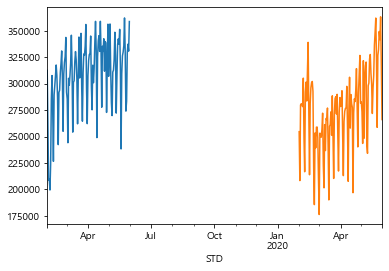

In [35]:
up_cnt['2019'].query('GU_NM == "서울 중구"').query('UP_NM == "요식업소"')['USE_CNT'].plot()
up_cnt['2020'].query('GU_NM == "서울 중구"').query('UP_NM == "요식업소"')['USE_CNT'].plot()

In [36]:
up_cnt

,GU_NM,UP_NM,USE_CNT
STD,,,
2019-02-01,대구 수성구,가구,15
2019-02-01,대구 수성구,가전,211
2019-02-01,대구 수성구,광학제품,76
2019-02-01,대구 수성구,레저업소,4302
2019-02-01,대구 수성구,레저용품,633
...,...,...,...
2020-05-31,서울 중구,의복,5362
2020-05-31,서울 중구,자동차정비,6188
2020-05-31,서울 중구,전기,10


In [37]:
a = up_cnt['2019'].query('GU_NM == "서울 중구" and UP_NM == "요식업소"')

In [38]:
def paa(series, paa_segments):
    """PAA implementation."""
    series_len = len(series)

    # check for the trivial case
    if (series_len == paa_segments):
        return np.copy(series)
    else:
        res = np.zeros(paa_segments)
        # check when we are even
        if (series_len % paa_segments == 0):
            inc = series_len // paa_segments
            for i in range(0, series_len):
                idx = i // inc
                np.add.at(res, idx, series[i])
                # res[idx] = res[idx] + series[i]
            return res / inc
        # and process when we are odd
        else:
            for i in range(0, paa_segments * series_len):
                idx = i // series_len
                pos = i // paa_segments
                np.add.at(res, idx, series[pos])
                # res[idx] = res[idx] + series[pos]
            return res / series_len

In [39]:
e = paa(series = a['USE_CNT'], paa_segments = 10) 
e

array([258188.5       , 297286.08333333, 308116.08333333, 305879.08333333,
       312990.66666667, 321448.25      , 323187.91666667, 316373.66666667,
       317629.16666667, 325622.66666667])

In [40]:
de = pd.DataFrame(data=e[:],    # values
              index=e[:],    # 1st column as index
              columns=['UP_CNT']
                 ) 
# add an column x that has its values set to the row index of each row
de['x'] = range(1, len(de) + 1)

In [41]:
de

,UP_CNT,x
258188.500000,258188.500000,1
297286.083333,297286.083333,2
308116.083333,308116.083333,3
305879.083333,305879.083333,4
312990.666667,312990.666667,5
321448.250000,321448.250000,6
323187.916667,323187.916667,7
316373.666667,316373.666667,8
317629.166667,317629.166667,9
325622.666667,325622.666667,10


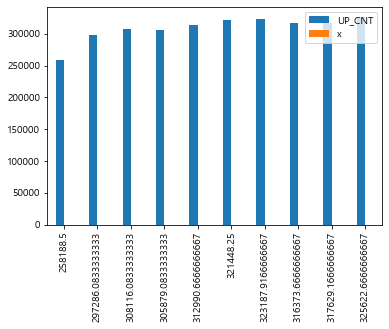

In [42]:
de.plot(kind = "bar")

In [43]:
# next import libraries
from saxpy.alphabet import cuts_for_asize
import numpy as np
from saxpy.znorm import znorm
from saxpy.sax import ts_to_string
from saxpy.paa import paa

In [44]:
# how many different categories to use or how many letters in the SAX alphabet
alphabet_size = 7
# normalize the altitude data series
data_znorm = znorm(a['USE_CNT'])
# use PAA for horizontal resolution reduction from 1300+ data points to 130 segments 
# Note: this is a fairly slow step
data_paa = paa(data_znorm, 10)
# create the SAX representation for the 130 data points
sax_representation_altitude_series = ts_to_string(data_paa, cuts_for_asize(alphabet_size))
sax_representation_altitude_series

'acdddeeeee'

In [45]:
import numpy as np
sax_array = np.array(list(sax_representation_altitude_series))
# create Pandas data frame from  numpy.ndarray
de = pd.DataFrame(data=sax_array[:],    # values
              index=sax_array[:],    # 1st column as index
              columns=['sax_up_cnt']
                 ) 
# add an column x that has its values set to the row index of each row
de['sax_category'] = de['sax_up_cnt'].apply(lambda letter: alphabet_size - (ord(letter)-97))
de['x'] = range(1, len(de) + 1)

fig = px.bar(de, x="x", y="sax_category", title='SAX Altitude Representation in our Walk Around the Fort')

fig.update_layout(
    yaxis = dict(
            ticktext = ['','g', 'f','e', 'd','c', 'b','a'],
            tickvals = [ 0, 1, 2, 3, 4, 5,6,7 ]
    ))
fig.show()

In [46]:
de

,sax_up_cnt,sax_category,x
a,a,7,1
c,c,5,2
d,d,4,3
d,d,4,4
d,d,4,5
e,e,3,6
e,e,3,7
e,e,3,8
e,e,3,9
e,e,3,10


In [ ]:
de.plot(x = 'x', y = 'sax_up_cnt', kind = 'bar')

In [ ]:
a['USE_CNT']